In [12]:

import torch
from torch_geometric.data import Data
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyvis.network import Network

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_warehouses = 500
num_products = 10
num_samples = 100

# Numeric features for products
product_id = np.arange(1, num_products + 1)
price = np.random.uniform(10, 100, num_products)
quantity_sold = np.random.randint(50, 500, num_products)
warehouse_stock = np.random.randint(100, 1000, num_products)
lead_time_days = np.random.randint(1, 30, num_products)
promotion_budget = np.random.uniform(1000, 5000, num_products)

# Target variable for products
demand = quantity_sold + np.random.randint(-50, 50, num_products)

# Create a DataFrame for products
df_products = pd.DataFrame({
    'Product_ID': product_id,
    'Price': price,
    'Quantity_Sold': quantity_sold,
    'Warehouse_Stock': warehouse_stock,
    'Lead_Time_Days': lead_time_days,
    'Promotion_Budget': promotion_budget,
    'Demand': demand
})

# Generate synthetic graph data with more links for each node
edges = []
for _ in range(num_samples):
    source_warehouse = np.random.choice(num_warehouses) + 1
    target_warehouse = np.random.choice(num_warehouses) + 1

    products_to_transfer = np.random.choice(product_id, size=np.random.randint(1, 5), replace=False)
    quantities = np.random.randint(1, 10, len(products_to_transfer))

    edges.append((source_warehouse, target_warehouse, {'products': products_to_transfer.tolist(), 'quantities': quantities.tolist()}))

    # Add more links for each node
    for _ in range(np.random.randint(1, 10)):
        additional_target_warehouse = np.random.choice(num_warehouses) + 1
        additional_products_to_transfer = np.random.choice(product_id, size=np.random.randint(1, 5), replace=False)
        additional_quantities = np.random.randint(1, 10, len(additional_products_to_transfer))
        edges.append((source_warehouse, additional_target_warehouse, {'products': additional_products_to_transfer.tolist(), 'quantities': additional_quantities.tolist()}))

# Create a directed graph
G = nx.DiGraph()
G.add_nodes_from(range(1, num_warehouses + 1))

# Add edges with product information
G.add_edges_from(edges)

# Create a PyVis Network
net = Network(notebook=True, width="100%", height="500px")

# Add nodes with different colors and labels for different warehouses
for node, attrs in G.nodes(data=True):
    warehouse_number = node
    color = f'#{warehouse_number % 256:02x}0000'  # Use different colors for different warehouses
    label = f'Warehouse {node}'
    net.add_node(node, color=color, label=label, title=label)

# Add edges with product names
for edge in G.edges(data=True, default=None):
    if isinstance(edge, tuple) and len(edge) == 3:
        source, target, attrs = edge
        products = ", ".join(str(p) for p in attrs.get('products', []))
        net.add_edge(source, target, label=f'{len(attrs.get("products", []))} products: {products}', title=f'{len(attrs.get("products", []))} products: {products}')

# Visualize the graph using pyvis
net.show("supply_chain_graph_labels_500.html")


supply_chain_graph_labels_500.html


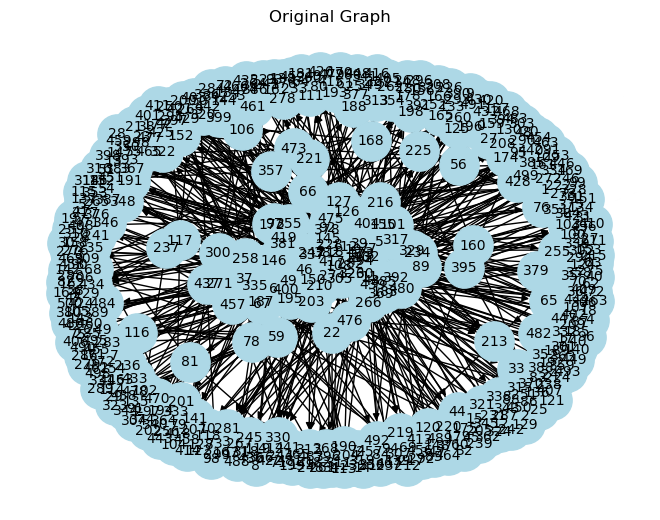

Initial node_embeddings shape: torch.Size([500, 16])
Edge index shape: torch.Size([2, 626])
original_supply_chain_graph_labels_500.html
Node embeddings shape before diffusion: torch.Size([500, 16])
Node embeddings after diffusion: torch.Size([500, 16])
diffusion_step_0_graph.html
Node embeddings shape before diffusion: torch.Size([500, 16])
Node embeddings after diffusion: torch.Size([500, 16])
diffusion_step_1_graph.html
Node embeddings shape before diffusion: torch.Size([500, 16])
Node embeddings after diffusion: torch.Size([500, 16])
diffusion_step_2_graph.html
Node embeddings shape before diffusion: torch.Size([500, 16])
Node embeddings after diffusion: torch.Size([500, 16])
diffusion_step_3_graph.html
Node embeddings shape before diffusion: torch.Size([500, 16])
Node embeddings after diffusion: torch.Size([500, 16])
diffusion_step_4_graph.html
Final node_embeddings shape: torch.Size([500, 16])
Synthetic features shape: torch.Size([500, 2])
Initial node_embeddings shape: torch.Size

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
import numpy as np
import pandas as pd
import networkx as nx
from pyvis.network import Network

# Set a random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Generate synthetic graph data
num_warehouses = 500
num_products = 10
num_samples = 100

# Numeric features for products
product_id = np.arange(1, num_products + 1)
price = np.random.uniform(10, 100, num_products)
quantity_sold = np.random.randint(50, 500, num_products)
warehouse_stock = np.random.randint(100, 1000, num_products)
lead_time_days = np.random.randint(1, 30, num_products)
promotion_budget = np.random.uniform(1000, 5000, num_products)

# Target variable for products
demand = quantity_sold + np.random.randint(-50, 50, num_products)

# Create a DataFrame for products
df_products = pd.DataFrame({
    'Product_ID': product_id,
    'Price': price,
    'Quantity_Sold': quantity_sold,
    'Warehouse_Stock': warehouse_stock,
    'Lead_Time_Days': lead_time_days,
    'Promotion_Budget': promotion_budget,
    'Demand': demand
})

# Generate synthetic graph data with more links for each node
edges = []
for _ in range(num_samples):
    source_warehouse = np.random.choice(num_warehouses)
    target_warehouse = np.random.choice(num_warehouses)

    products_to_transfer = np.random.choice(product_id, size=np.random.randint(1, 5), replace=False)
    quantities = np.random.randint(1, 10, len(products_to_transfer))

    edges.append((source_warehouse, target_warehouse, {'products': products_to_transfer.tolist(), 'quantities': quantities.tolist()}))

    # Add more links for each node
    for _ in range(np.random.randint(1, 10)):
        additional_target_warehouse = np.random.choice(num_warehouses)
        additional_products_to_transfer = np.random.choice(product_id, size=np.random.randint(1, 5), replace=False)
        additional_quantities = np.random.randint(1, 10, len(additional_products_to_transfer))
        edges.append((source_warehouse, additional_target_warehouse, {'products': additional_products_to_transfer.tolist(), 'quantities': additional_quantities.tolist()}))

# Create a directed graph
G = nx.DiGraph()
G.add_nodes_from(range(1, num_warehouses + 1))

# Add edges with product information
G.add_edges_from(edges)

# Visualize the original graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
plt.title('Original Graph')
plt.show()

class GraphDDPM(nn.Module):
    def __init__(self, num_warehouses, embedding_dim):
        super(GraphDDPM, self).__init__()
        self.embedding = nn.Embedding(num_warehouses + 1, embedding_dim)
        self.diffusion_layer = nn.GRUCell(embedding_dim, embedding_dim)
        self.output_layer = nn.Linear(embedding_dim, 2)

    def forward(self, edge_index):
        node_embeddings = self.embedding(torch.arange(1, num_warehouses + 1))
        print(f"Initial node_embeddings shape: {node_embeddings.shape}")

        print(f"Edge index shape: {edge_index.shape}")

        # Create a PyVis Network
        net = Network(notebook=True, width="100%", height="500px")

        # Add nodes with different colors and labels for different warehouses
        for node, attrs in G.nodes(data=True):
            warehouse_number = node
            color = f'#{warehouse_number % 256:02x}0000'  # Use different colors for different warehouses
            label = f'Warehouse {node}'
            net.add_node(node, color=color, label=label, title=label)

        # Add edges with product names
        for edge in G.edges(data=True, default=None):
            if isinstance(edge, tuple) and len(edge) == 3:
                source, target, attrs = edge
                products = ", ".join(str(p) for p in attrs.get('products', []))
                net.add_edge(source, target, label=f'{len(attrs.get("products", []))} products: {products}', title=f'{len(attrs.get("products", []))} products: {products}')

        # Visualize the graph using pyvis
        net.show("original_supply_chain_graph_labels_500.html")

        # Perform graph diffusion process
        for _ in range(5):
            # Add prints to check dimensions
            print(f"Node embeddings shape before diffusion: {node_embeddings.shape}")
            
            # Adjust to ensure consistent batch size
            node_embeddings = self.diffusion_layer(node_embeddings, node_embeddings[edge_index[1][:node_embeddings.size(0)]])
            print(f"Node embeddings after diffusion: {node_embeddings.shape}")

            # Add nodes with different colors and labels for different warehouses
            for node in range(1, num_warehouses + 1):
                warehouse_number = node
                color = f'#{warehouse_number % 256:02x}0000'  # Use different colors for different warehouses
                label = f'Warehouse {node}'
                net.add_node(node, color=color, label=label, title=label)

            # Add edges with product names
            for edge in edge_index.t().tolist():
                source, target = edge
                net.add_edge(source, target)

            # Visualize the graph using pyvis
            net.show(f"diffusion_step_{_}_graph.html")

        print(f"Final node_embeddings shape: {node_embeddings.shape}")

        synthetic_features = self.output_layer(node_embeddings)

        print(f"Synthetic features shape: {synthetic_features.shape}")

        return synthetic_features



# Initialize the model
model = GraphDDPM(num_warehouses, embedding_dim=16)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Generate synthetic graph data for training
edge_index = torch.tensor(list(G.edges)).t().contiguous()
synthetic_features = model(edge_index)
labels = torch.zeros(num_warehouses, dtype=torch.long)  # Binary classification task, change as needed

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = model(edge_index)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{num_epochs}, Loss: {loss.item()}')

# Generate synthetic graph data for testing
synthetic_features = model(edge_index)

# Visualize the synthetic graph using PyVis
synthetic_probs = torch.softmax(synthetic_features, dim=-1)
synthetic_labels = synthetic_probs[:, 1] > 0.5  # Threshold for binary classification

synthetic_G = nx.DiGraph()
synthetic_G.add_nodes_from(range(1, num_warehouses + 1))
synthetic_G.add_edges_from(edge_index.t().tolist())

# Create a PyVis Network
net = Network(notebook=True, width="100%", height="500px")
net.from_nx(synthetic_G)

# Visualize the graph with the same types of labels
net.show("synthetic_graph_labels_500.html")
